In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
import warnings
warnings.filterwarnings('ignore')

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [34]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()


In [4]:
X_train.shape

(60000, 28, 28)

In [35]:
X_test.shape


(10000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
y_test.shape

(10000,)

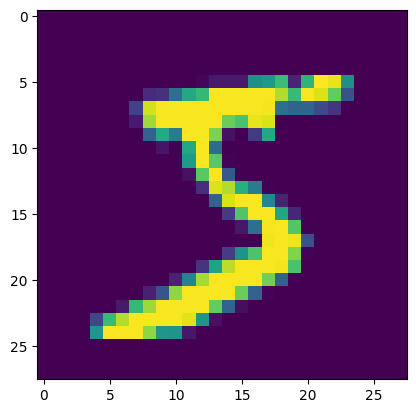

In [8]:
# Plotting and viewing the dataset image:
plt.imshow(X_train[0])

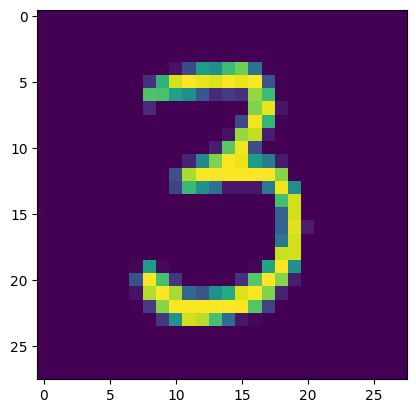

In [9]:
plt.imshow(X_train[50])

In [10]:
# Images in values of pixel:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

We can bring all the values between 0 to 1 in order to get better results, since all the values being in a same range. Hence we can divide the values by 255 (Max Value).

In [11]:
X_train = X_train/255
X_test = X_test/255

In [13]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Artificial Neural Networking:

In [14]:
model = Sequential()

In [15]:
model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

Model Training:

In [19]:
his = model.fit(X_train, y_train, epochs=25, validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0058 - accuracy: 0.9982 - val_loss: 0.1402 - val_accuracy: 0.9774
Epoch 2/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0095 - accuracy: 0.9970 - val_loss: 0.1602 - val_accuracy: 0.9747
Epoch 3/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0047 - accuracy: 0.9982 - val_loss: 0.1850 - val_accuracy: 0.9747
Epoch 4/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0100 - accuracy: 0.9969 - val_loss: 0.1456 - val_accuracy: 0.9779
Epoch 5/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0072 - accuracy: 0.9980 - val_loss: 0.1616 - val_accuracy: 0.9757
Epoch 6/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0077 - accuracy: 0.9976 - val_loss: 0.1559 - val_accuracy: 0.9778
Epoch 7/25
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0063 - accuracy: 0.9980 - val_loss: 0.1652 - val_accuracy

In [20]:
yProb = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [21]:
yPred = yProb.argmax(axis=1)

Model Evaluation:

In [22]:
from sklearn.metrics import accuracy_score


In [23]:
accuracy_score(y_test, yPred)

0.9771

Training & Validation loss:

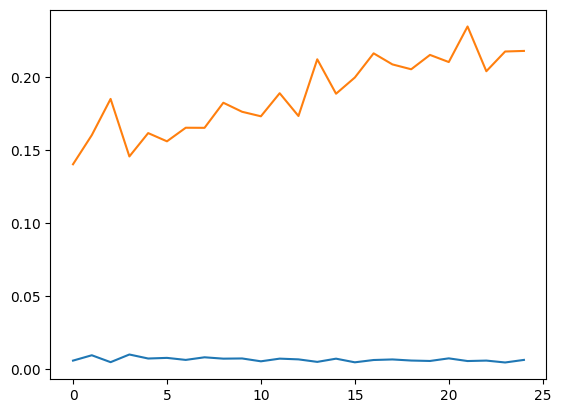

In [24]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])

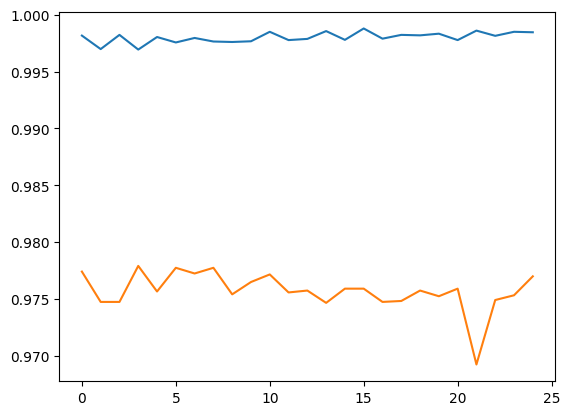

In [25]:
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])

Predictive Model:

Prediction 1

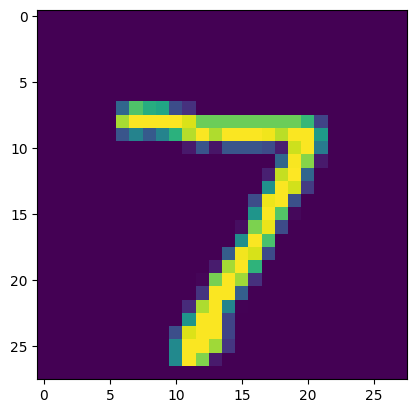

In [26]:
plt.imshow(X_test[0])

In [27]:
model.predict(X_test[0].reshape(1,28,28))

1/1 [==============================] - 0s 20ms/step


array([[3.9295740e-21, 3.2203812e-20, 4.3078388e-14, 3.7237656e-15,
        7.6536230e-30, 1.3985561e-25, 1.4756640e-35, 1.0000000e+00,
        2.5684469e-24, 7.7746759e-17]], dtype=float32)

In [28]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 81ms/step


array([7])

Prediction 2

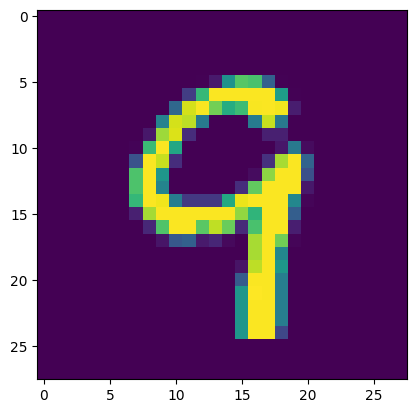

In [29]:
plt.imshow(X_test[150])

In [30]:
model.predict(X_test[150].reshape(1,28,28))

1/1 [==============================] - 0s 25ms/step


array([[7.5384993e-23, 8.6809280e-31, 1.4529375e-25, 1.7535899e-14,
        8.2960828e-23, 5.2818807e-18, 1.9462566e-32, 8.4528674e-16,
        6.8007031e-16, 1.0000000e+00]], dtype=float32)

In [31]:
model.predict(X_test[150].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 20ms/step


array([9])